# Práctica 7

Integrantes:
- Angel Martinez
- Alejandra Sarria
- Juan Segura

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit


# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

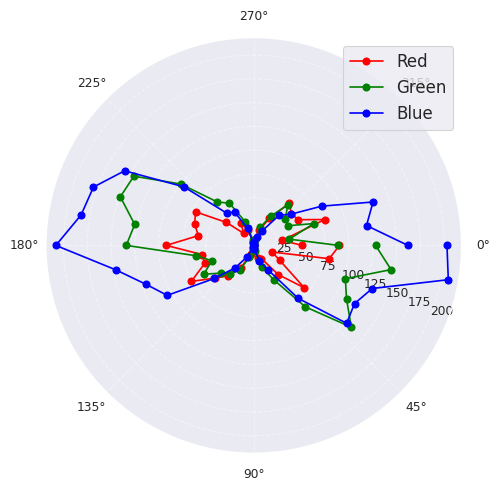

In [13]:
canales = ['Blanco', 'Rojo', 'Verde', 'Azul']
color_roi = {'Blanco':'black', 'Rojo':'red', 'Verde':'green', 'Azul':'blue'}
color_pix = {'Blanco':'grey', 'Rojo':'#E08793', 'Verde':'#50BF3D', 'Azul':'#3D94BF'}
canal_abrev = {'Blanco':'Blanco', 'Rojo':'R', 'Verde':'G', 'Azul':'B'}

def graficar_I(num_pix):
    rojo = pd.read_csv("Practica7_datos/ROI_Rojo.csv", sep=',')
    pix_R = np.array(rojo[f"Mean(pix{num_pix})"])

    verde = pd.read_csv("Practica7_datos/ROI_Verde.csv", sep=',')
    pix_G = np.array(verde[f"Mean(pix{num_pix})"])

    azul = pd.read_csv("Practica7_datos/ROI_Azul.csv", sep=',')
    pix_B = np.array(azul[f"Mean(pix{num_pix})"])

    ang_deg = np.arange(0, 370, 10)
    ang_rad = np.deg2rad(ang_deg)

    pix_R = pix_R * np.cos(ang_rad)**2
    pix_G = pix_G * np.cos(ang_rad)**2
    pix_B = pix_B * np.cos(ang_rad)**2

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 5))
    ax.plot(ang_rad, pix_R, 'o-', color='red', label='Red')
    ax.plot(ang_rad, pix_G, 'o-', color='green', label='Green')
    ax.plot(ang_rad, pix_B, 'o-', color='blue', label='Blue')
    ax.set_theta_zero_location("E")   # 0° sobre eje x
    ax.set_theta_direction(-1)        # sentido horario
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='upper right', fontsize=12)
    fig.tight_layout()
    fig.savefig(f"Prac7_pix{num_pix}.pdf", dpi=300)

graficar_I(1)